# Business Problem Statement:
A group of customers were given an offer in person that they can get a loan at discounted rate and
processing fee will be waived off. A pilot campaign was conducted to get response from customers
whether they are interested in taking out a loan or not. Response was recorded and data was collected.

### Task List

- [x] Build a model to predict whether customers will be interested in taking out a loan or not.
- [x] Identifying features which are most important
- [x] In case of black box models e.g. Random forest use SHAP, LIME to figure out features affecting the target variable
- [x] Try Unsupervised clustering models
- [x] Remove Unnecessary Models from the File
- [x] Generate synthetic data for model.
- [x] Approaching a customer has costs involved with it, hence find the profitable segments so that more customized marketing can be done.
- [x] Need to write inferences what is going on
- [x] Matrix evaluation for all 20% above models 
- [x] KS Scaling
- [x] Variance Inflation Factor (VIF)
- [x] Bucketing Age and SCR
- [x] Business Output

Variables involved: `Customer_id`, `Age`, `Gender`, `Balance`, `Occupation`, `No of Credit transaction`, `SCR`, `Holding period`

## Understanding Complex Variables


- `Holding Period` (How long the customer is able to hold the money in his account.. So, if they have some existing expenses like a loan EMI or any other monthly expense which gets deducted, usually the first week of every month, hence it makes the balance in the account lower during initial days of the month itself.Higher the holding period, more stable their money is in the account.)

- `SCR` SCR is a score given to a customer for a particular product ( in this case loan ) based on certain parameters, to know whether how likely that customer is to buy that product.. so, higher the score, higher the probability, the customer will buy it. SCR propensity of a customer to respond to a digital marketing


## Business Conclusion

#####  HOLDING PERIOD Vs AVG BALANCE

1. The avg holding period and avg balance tend to show high collinearity as they are directly proportional and it can be verified from "Misc_Dash".

2. Self employed class in both genders were able to hold money in their account for a long time resulting in high balance amount.

##### Which Category of Customers Tend to opt for Loans?

Customers with the below traits tend to be inclined towards opting for a loan;

1. Females who own small business/self-owned (SENP) business show higher SCR.

2. Males who are self employed (SELF-EMP) show higher SCR .

3. High SCR's but least holding period i.e. who tend to have EMI's or other deductions from their account.

4. Higher Avg credit transactions shows that the customer is more likely to opt for a loan. As Credit transactions show direct proportionality to SCR values.

##### Final Conclusions

1. From the given data it can be observed that in Females Self Employed tend to be the early bread earners whereas in case of Males Small Business owners tend to be the early bread earners.

2. For both the genders higher avg balance amount is observed in the accounts of Small business owners, second highest avg balance is observed for Professionals (PROF) category customers.


##### Which Category of Customers TEND NOT TO OPT for Loans?

1. In Males, Salaried & Professional class employees tend to not opt for loans as they must have constant inflow of cash.

2. In Females, Professional class employees tend to not opt for loans.

3. In both the genders, customers showing higher holding period tend to not opt for loans as there are less deductions over long time periods.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# from pandasgui import show

### Reading Data from CSV file

In [3]:
data = pd.read_csv('Model_data.csv')
# show(data)

In [4]:
data.Balance = data.Balance.astype('int32') #Truncating decimals

In [5]:
data.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,M,91519,SELF-EMP,38,926,15
1,0,52,M,117288,SAL,17,768,13
2,0,31,F,259827,SENP,8,816,5
3,0,45,F,26677,PROF,14,353,18
4,0,39,F,43440,SENP,1,751,31


In [6]:
data.Balance.describe()

count    2.000000e+04
mean     1.461808e+05
std      1.698125e+05
min      0.000000e+00
25%      2.373650e+04
50%      7.975550e+04
75%      2.173100e+05
max      1.246966e+06
Name: Balance, dtype: float64

In [7]:
data.shape

(20000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target          20000 non-null  int64 
 1   Age             20000 non-null  int64 
 2   Gender          20000 non-null  object
 3   Balance         20000 non-null  int32 
 4   Occupation      20000 non-null  object
 5   No_OF_CR_TXNS   20000 non-null  int64 
 6   SCR             20000 non-null  int64 
 7   Holding_Period  20000 non-null  int64 
dtypes: int32(1), int64(5), object(2)
memory usage: 1.1+ MB


In [9]:
data.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.086650,38.396200,1.461808e+05,16.653050,557.136050,15.344100
std,0.281329,9.600179,1.698125e+05,12.977704,260.521453,8.952128
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.373650e+04,7.000000,333.000000,8.000000
50%,0.000000,38.000000,7.975550e+04,13.000000,560.000000,16.000000
75%,0.000000,47.000000,2.173100e+05,22.000000,784.000000,23.000000
max,1.000000,55.000000,1.246966e+06,50.000000,999.000000,31.000000


`Gender` and `Occupation` are categorical varibles stored as object type

### ------------------------------------------------------Start of Exploratory Data Analysis-------------------------------------------------------

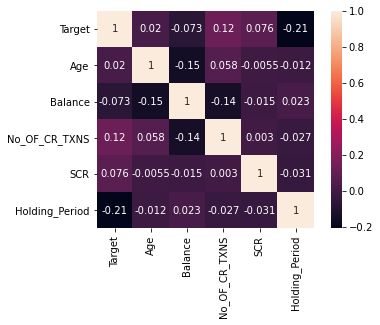

In [10]:
sns.heatmap(data.corr(), annot=True, square=True) # No strong correlations seen overall
plt.show()

###### Inferences: 

- `TARGET` does show maximum correlation w.r.t `No_OF_CR_TXNS` among other variables. Remaining correlations have to be visualized in order to understand if there's any sort of trend in data.

In [11]:
# sns.pairplot(data, hue='Target')
# plt.show()

##### Inferences from Pair-Plot: 

- People who tend to opt for loan have less `BALANCE` w.r.t people not buying loan.
- People having higher `BALANCE` tend to be in between 35-50 years of `AGE`.
- People having less `BALANCE` tend to show more interest towards loans i.e. higher `SCR` values.
- People having less `BALANCE` tend to have higher `No of Credit transactions` opt for loans.
- People having less `BALANCE` have higher `HOLDING PERIOD` who opt for loans.

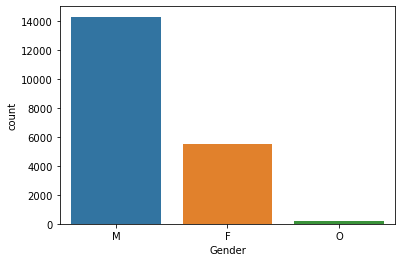

In [12]:
sns.countplot(x = data.Gender)
plt.show()

###### Observation: 

- Since `GENDER` = `"OTHERS"/"O"` has very less population size i.e. less than 1% of entire data hence can be omitted as an attribute from `GENDER` category.

In [13]:
data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [14]:
data.Occupation.unique()

array(['SELF-EMP', 'SAL', 'SENP', 'PROF'], dtype=object)

In [15]:
data.Gender.value_counts()

M    14279
F     5525
O      196
Name: Gender, dtype: int64

In [16]:
data.drop(data.Gender[data.Gender== 'O'].index, axis = 0, inplace= True) # Removed 196 rows with `Gender` = 'O'

In [17]:
data.shape

(19804, 8)

In [18]:
data.Balance.describe()

count    1.980400e+04
mean     1.465609e+05
std      1.694485e+05
min      0.000000e+00
25%      2.399900e+04
50%      8.035100e+04
75%      2.183090e+05
max      1.246966e+06
Name: Balance, dtype: float64

In [19]:
# sns.histplot(data.Age)

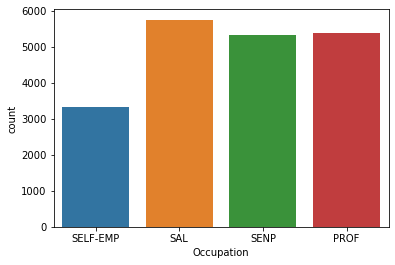

In [20]:
sns.countplot(x = data.Occupation)

###### Inferences: 

- The data consists mostly of `Salaried` category employees, whereas `Business Owners` and `Professionals` occupy the same strength in the data.

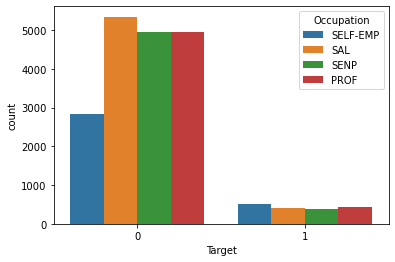

In [21]:
sns.countplot(x=data.Target, hue=data.Occupation) ## Self employed are much more likely to take loans

##### Inferences: 

- Most people who opted for loans tend to be either `Self-Employed` or `Small businesses` whereas `Salaried` people showed quite less interest in taking up loans since they had fixed income.

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


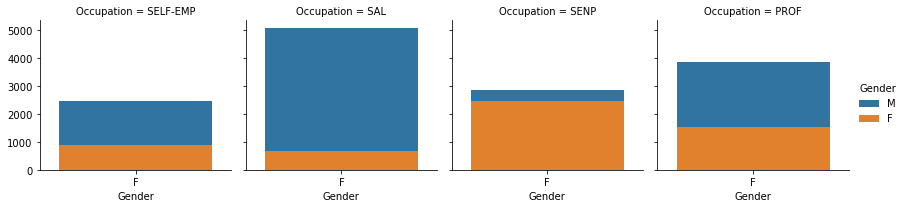

In [22]:
g = sns.FacetGrid(data, col='Occupation', hue="Gender")
plt.grid(True)
g.map(sns.countplot, "Gender", alpha=1)
g.add_legend()
plt.grid((False))

###### Inferences: 

- Most of the `Males` tend to be either in `Salaried` employee class (nearly 85%) or `working professionals` (nearly 70%) whereas most `Women` (nearly 90%) tend to start-up their own `business's` and manage them.

--------------------------

In [23]:
# sns.histplot(data.No_OF_CR_TXNS)

In [24]:
data.No_OF_CR_TXNS.describe()

count    19804.000000
mean        16.563169
std         12.928214
min          0.000000
25%          7.000000
50%         13.000000
75%         21.000000
max         50.000000
Name: No_OF_CR_TXNS, dtype: float64

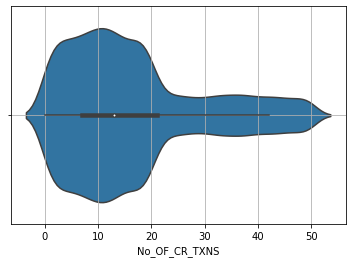

In [25]:
sns.violinplot(x=data.No_OF_CR_TXNS)
plt.grid(True)

###### Inferences: 

- The average `No. of Credit Transactions` tend to be in between 10 and 20. Whereas very few transactions tend to be in the number of 30-50.  

In [26]:
# len(data[data.No_OF_CR_TXNS==0].index)

In [27]:
# data.drop(index=data[data.No_OF_CR_TXNS==0].index, axis=0)

------------------

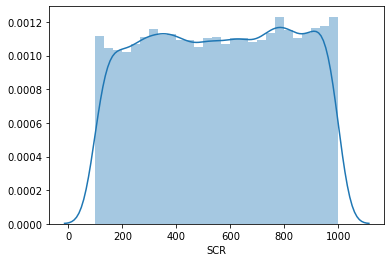

In [28]:
# sns.displot(data.SCR, kind = 'kde')
sns.distplot(data.SCR)
plt.show()

###### Inferences: 

- A uniform distribution can be observed for `SCR` and no skewness is found in the given data. 

In [29]:
data.SCR.describe()

count    19804.000000
mean       557.115987
std        260.562729
min        100.000000
25%        332.000000
50%        560.500000
75%        784.250000
max        999.000000
Name: SCR, dtype: float64

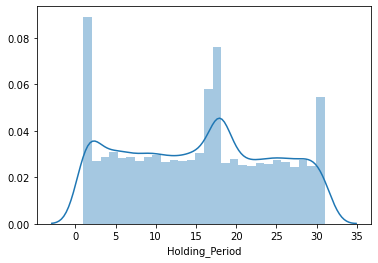

In [30]:
sns.distplot(data.Holding_Period)

In [31]:
data3 = data

### ------------------------------------------------------End of Exploratory Data Analysis-------------------------------------------------------
-----------
----------

### Pretty Report Printing Function

In [32]:
# A class for pretty printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# function for validation on test data   
def classification_report(y_true, y_prediction, type_of_data='Enter Over/Under/Original sampled', type_of_classifier='ClassifierName'):
    """Print Classification report"""
    
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction)
    recall = recall_score(y_true, y_prediction)
    f1 = f1_score(y_true, y_prediction)
    
    print('Classification Report on Testing Data:\n'+ color.BOLD + type_of_data, 'data\n'+color.END+color.RED+color.BOLD+type_of_classifier,'Classifier'+color.END+color.END)
    print()
    print('---------------------------------------')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1 score: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print('---------------------------------------')
    print()


# A function for cross-validation report    
def cross_val_report(classifier, train_data, train_label, cv=10, scoring=['recall','precision', 'f1','accuracy']):
    
    score = cross_validate(classifier, train_data, train_label, cv=cv, scoring= scoring)
    recall = np.mean(score['test_recall'])
    precision = np.mean(score['test_precision'])
    f1 = np.mean(score['test_f1'])
    accuracy= np.mean(score['test_accuracy'])
    print('Cross Validation Report')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print()
    print("*Mean values presented")
    print('---------------------------------------')

### Creating the first set of training and test data on imbalanced data

In [33]:
df = pd.get_dummies(data, columns=['Gender','Occupation'], drop_first = True)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,0,41,91519,38,926,15,1,0,1,0
1,0,52,117288,17,768,13,1,1,0,0
2,0,31,259827,8,816,5,0,0,0,1
3,0,45,26677,14,353,18,0,0,0,0
4,0,39,43440,1,751,31,0,0,0,1


#### Creating a model with Original Unbalanced data and measuring metrics

In [34]:
X_original = df.iloc[:,1:]
y_original = df.iloc[:,0]

In [35]:
X_original

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,41,91519,38,926,15,1,0,1,0
1,52,117288,17,768,13,1,1,0,0
2,31,259827,8,816,5,0,0,0,1
3,45,26677,14,353,18,0,0,0,0
4,39,43440,1,751,31,0,0,0,1
...,...,...,...,...,...,...,...,...,...
19995,23,67612,20,164,27,0,0,0,1
19996,34,472365,8,124,1,0,0,0,0
19997,42,100642,4,263,1,1,1,0,0
19998,36,29950,10,345,31,1,0,0,1


In [36]:
X_original.columns

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_M',
       'Occupation_SAL', 'Occupation_SELF-EMP', 'Occupation_SENP'],
      dtype='object')

In [37]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original,y_original, shuffle = ['True'], stratify=y_original)
X_test_orig.reset_index(inplace = True, drop=True)
y_test_orig.reset_index(inplace = True, drop=True)

### ------------------------------------------------------Start of Model Exploration---------------------------------------------------------------

#### Create undersampled data and fit a model

In [38]:
X_under_train, y_under_train = NearMiss().fit_resample(X_train_orig, y_train_orig)

In [39]:
data[data.Target==1].shape

(1709, 8)

In [40]:
X_under_train.shape, y_under_train.shape

((2564, 9), (2564,))

--------------------

> Model on  an oversampled dataset

In [41]:
X_over_train, y_over_train = SMOTE().fit_resample(X_train_orig, y_train_orig)

---------------

In [42]:
print("Original:     "+color.BOLD+ "X_original,y_original"+color.END+"::  X_train_orig, X_test_orig, y_train_orig, y_test_orig")
print()
print("Undersampled:"+color.BOLD+ " X_under, y_under"+color.END+"     ::  X_under_train, y_under_train")
print()
print("Oversampled:"+color.BOLD+ "  X_over, y_over"+color.END+"       ::  X_over_train, y_over_train")

Original:     X_original,y_original::  X_train_orig, X_test_orig, y_train_orig, y_test_orig

Undersampled: X_under, y_under     ::  X_under_train, y_under_train

Oversampled:  X_over, y_over       ::  X_over_train, y_over_train


The above datasets can be better sampled by adjusting hyper-parameters of NearMiss and SMOTE, or other methods of sampling could be used

## Random Forest Classifier - Original Data

Classification Report on Testing Data:
Original data
Random Forest Classifier

---------------------------------------
Recall: 0.1522248243559719
Precision: 0.6914893617021277
F1 score: 0.24952015355086374
Accuracy: 0.921026055342355
---------------------------------------

Cross Validation Report
Recall: 0.7839147286821706
Precision: 0.7914599176735873
F1: 0.7871108822778579
Accuracy: 0.7878100680933853

*Mean values presented
---------------------------------------


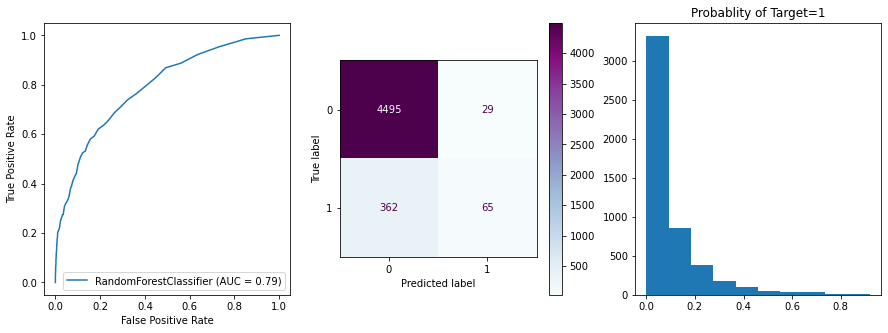

In [43]:
clf_rf0 = RandomForestClassifier()
clf_rf0.fit(X_train_orig, y_train_orig)
y_predict= clf_rf0.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Original', 'Random Forest')

cross_val_report(clf_rf0, X_under_train, y_under_train)


fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(clf_rf0, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(clf_rf0, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = clf_rf0.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [44]:
confusion_matrix(y_test_orig, y_predict)

array([[4495,   29],
       [ 362,   65]], dtype=int64)

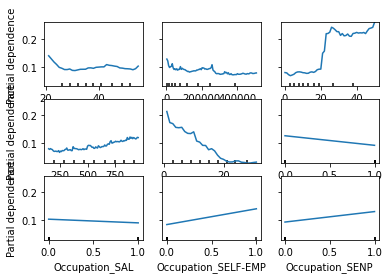

In [45]:
plot_partial_dependence(clf_rf0, X_test_orig, X_test_orig.columns)

-------------

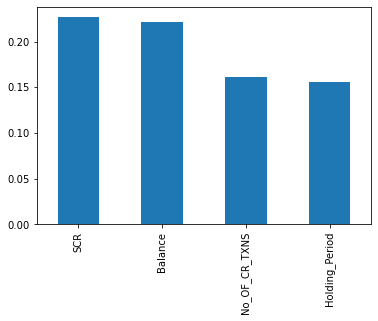

In [46]:
(pd.Series(clf_rf0.feature_importances_, index=X_test_orig.columns)
   .nlargest(4)
   .plot(kind='bar'))

##### Inferences: 

- The prominent features are: `SCR`,`BALANCE`,`No_OF_CR_TXNS`,`Holding_Period`

### KS Stats for Random Forest - Original Data

In [47]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

ValueError: Bin edges must be unique: array([0.  , 0.  , 0.01, 0.02, 0.03, 0.05, 0.07, 0.1 , 0.15, 0.24, 0.92]).
You can drop duplicate edges by setting the 'duplicates' kwarg

## RFE Implementation

In [48]:
from sklearn.feature_selection import RFE

In [49]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=4)
rfe = rfe.fit(X_over_train, y_over_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True False False False False]
[2 1 1 1 1 5 3 6 4]


In [50]:
X_over_train.columns

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_M',
       'Occupation_SAL', 'Occupation_SELF-EMP', 'Occupation_SENP'],
      dtype='object')

##### Inferences:

- RFE algorithm decided prominent features: `SCR`,`BALANCE`,`No_OF_CR_TXNS`,`Holding_Period`

In [51]:
categorical_features_indices = np.where(X_train_orig.dtypes != np.float)[0]

In [52]:
categorical_features_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

## RandomForest Classifier - Undersampled Data

In [53]:
X_train_orig.columns

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_M',
       'Occupation_SAL', 'Occupation_SELF-EMP', 'Occupation_SENP'],
      dtype='object')

Classification Report on Testing Data:
Undersampled data
Random Forest Classifier

---------------------------------------
Recall: 0.8360655737704918
Precision: 0.10552763819095477
F1 score: 0.18740157480314962
Accuracy: 0.3746717834780852
---------------------------------------

Cross Validation Report
Recall: 0.791733284883721
Precision: 0.7930564972924856
F1: 0.7916527521378474
Accuracy: 0.7913196133268483

*Mean values presented
---------------------------------------


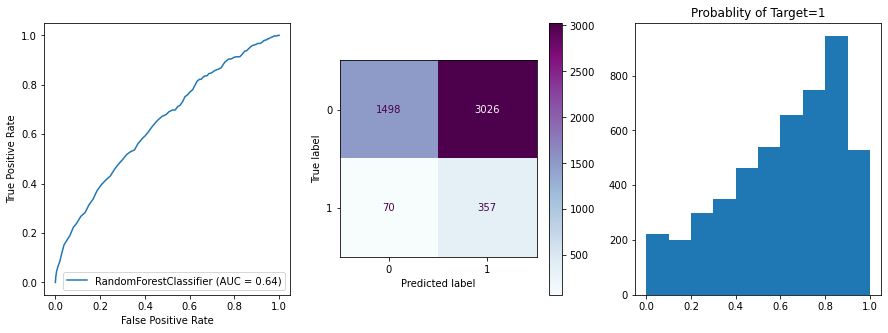

In [54]:
clf_rf1 = RandomForestClassifier()
clf_rf1.fit(X_under_train, y_under_train)
y_predict= clf_rf1.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Undersampled', 'Random Forest')
cross_val_report(clf_rf1, X_under_train, y_under_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(clf_rf1, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(clf_rf1, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = clf_rf1.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [55]:
confusion_matrix(y_test_orig, y_predict)

array([[1498, 3026],
       [  70,  357]], dtype=int64)

### KS Stats for Random Forest - Undersampled Data

In [56]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,lift_1,lift_2
0,10,456,95,361,20.833333,79.166667,456,95,361,26.610644,7.858076,18.752569,20.833333,2.889239
1,9,449,49,400,10.913140,89.086860,905,144,761,40.336134,16.565085,23.771050,15.911602,2.206676
2,8,570,60,510,10.526316,89.473684,1475,204,1271,57.142857,27.666522,29.476336,13.830508,1.918063
3,7,428,35,393,8.177570,91.822430,1903,239,1664,66.946779,36.221158,30.725621,12.559117,1.741742
4,6,540,48,492,8.888889,91.111111,2443,287,2156,80.392157,46.930779,33.461378,11.747851,1.629233
5,5,498,34,464,6.827309,93.172691,2941,321,2620,89.915966,57.030910,32.885057,10.914655,1.513682
6,4,523,36,487,6.883365,93.116635,3464,357,3107,100.000000,67.631694,32.368306,10.306005,1.429273
7,3,495,0,495,0.000000,100.000000,3959,357,3602,100.000000,78.406617,21.593383,9.017429,1.250568
8,2,492,0,492,0.000000,100.000000,4451,357,4094,100.000000,89.116239,10.883761,8.020670,1.112334
9,1,500,0,500,0.000000,100.000000,4951,357,4594,100.000000,100.000000,0.000000,7.210665,1.000000


-------------

## RandomForest Classifier - Oversampled Data

In [57]:
clf_rf2 = RandomForestClassifier()

Classification Report on Testing Data:
Oversampled data
Random Forest Classifier

---------------------------------------
Recall: 0.40749414519906324
Precision: 0.24
F1 score: 0.3020833333333333
Accuracy: 0.8376085639264795
---------------------------------------

Cross Validation Report
Recall: 0.9154788404205327
Precision: 0.8868833484350895
F1: 0.8986055698999224
Accuracy: 0.8998274685112729

*Mean values presented
---------------------------------------


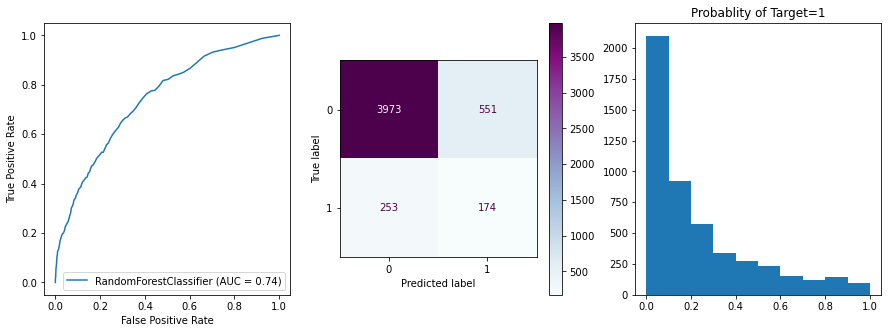

In [58]:
clf_rf2.fit(X_over_train, y_over_train)
y_predict= clf_rf2.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Oversampled', 'Random Forest')

cross_val_report(clf_rf2, X_over_train, y_over_train)



fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(clf_rf2, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(clf_rf2, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = clf_rf2.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [59]:
confusion_matrix(y_test_orig, y_predict)

array([[3973,  551],
       [ 253,  174]], dtype=int64)

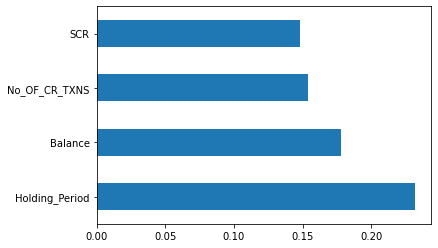

In [60]:
(pd.Series(clf_rf2.feature_importances_, index=X_test_orig.columns)
   .nlargest(4)
   .plot(kind='barh'))

### KS Stats for Random Forest - Oversampled Data

In [61]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,lift_1,lift_2
0,10,477,132,345,27.672956,72.327044,477,132,345,75.0,7.225131,67.774869,27.672956,7.784591
1,9,513,44,469,8.576998,91.423002,990,176,814,100.0,17.047120,82.952880,17.777778,5.001010
2,8,495,0,495,0.000000,100.000000,1485,176,1309,100.0,27.413613,72.586387,11.851852,3.334007
3,7,445,0,445,0.000000,100.000000,1930,176,1754,100.0,36.732984,63.267016,9.119171,2.565285
4,6,501,0,501,0.000000,100.000000,2431,176,2255,100.0,47.225131,52.774869,7.239819,2.036610
5,5,519,0,519,0.000000,100.000000,2950,176,2774,100.0,58.094241,41.905759,5.966102,1.678305
6,4,446,0,446,0.000000,100.000000,3396,176,3220,100.0,67.434555,32.565445,5.182568,1.457892
7,3,389,0,389,0.000000,100.000000,3785,176,3609,100.0,75.581152,24.418848,4.649934,1.308058
8,2,530,0,530,0.000000,100.000000,4315,176,4139,100.0,86.680628,13.319372,4.078795,1.147393
9,1,636,0,636,0.000000,100.000000,4951,176,4775,100.0,100.000000,0.000000,3.554837,1.000000


----------
----------------

## Logistic Regression - Original Data

In [62]:
from sklearn.linear_model import LogisticRegression

Classification Report on Testing Data:
Original data
Logistic Regression Classifier

---------------------------------------
Recall: 0.01639344262295082
Precision: 0.5833333333333334
F1 score: 0.03189066059225513
Accuracy: 0.9141587558069076
---------------------------------------

Cross Validation Report
Recall: 0.6880026647286821
Precision: 0.6849240346044005
F1: 0.6846632302122345
Accuracy: 0.6817910992217898

*Mean values presented
---------------------------------------


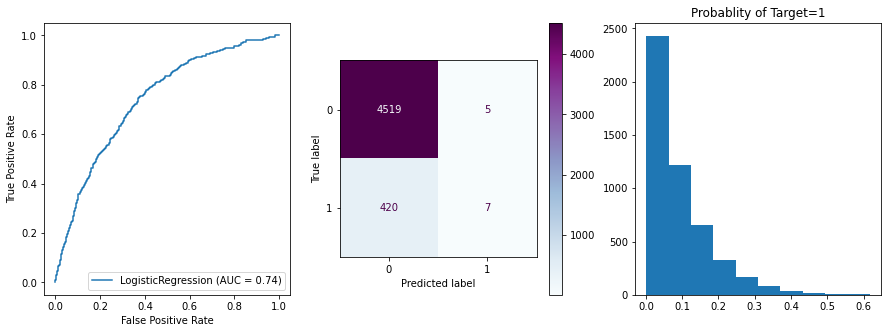

In [63]:
lr0 = LogisticRegression(max_iter=1000)
lr0.fit(X_train_orig, y_train_orig)
y_predict= lr0.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Original', 'Logistic Regression')

cross_val_report(lr0, X_under_train, y_under_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr0, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr0, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr0.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [64]:
confusion_matrix(y_test_orig, y_predict)

array([[4519,    5],
       [ 420,    7]], dtype=int64)

### KS Stats for Logistic Regression - Original Data

In [65]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,lift_1,lift_2
0,10,495,7,488,1.414141,98.585859,495,7,488,100.0,9.870550,90.129450,1.414141,10.002020
1,9,495,0,495,0.000000,100.000000,990,7,983,100.0,19.882686,80.117314,0.707071,5.001010
2,8,495,0,495,0.000000,100.000000,1485,7,1478,100.0,29.894822,70.105178,0.471380,3.334007
3,7,495,0,495,0.000000,100.000000,1980,7,1973,100.0,39.906958,60.093042,0.353535,2.500505
4,6,495,0,495,0.000000,100.000000,2475,7,2468,100.0,49.919094,50.080906,0.282828,2.000404
5,5,495,0,495,0.000000,100.000000,2970,7,2963,100.0,59.931230,40.068770,0.235690,1.667003
6,4,495,0,495,0.000000,100.000000,3465,7,3458,100.0,69.943366,30.056634,0.202020,1.428860
7,3,495,0,495,0.000000,100.000000,3960,7,3953,100.0,79.955502,20.044498,0.176768,1.250253
8,2,495,0,495,0.000000,100.000000,4455,7,4448,100.0,89.967638,10.032362,0.157127,1.111336
9,1,496,0,496,0.000000,100.000000,4951,7,4944,100.0,100.000000,0.000000,0.141386,1.000000


## Logistic Regression - Undersampled Data

Classification Report on Testing Data:
Undersampled data
Logistic Regression Classifier

---------------------------------------
Recall: 0.7353629976580797
Precision: 0.14030384271671134
F1 score: 0.23564727954971856
Accuracy: 0.5885679660674611
---------------------------------------



C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

Cross Validation Report
Recall: 0.6880026647286821
Precision: 0.6849240346044005
F1: 0.6846632302122345
Accuracy: 0.6817910992217898

*Mean values presented
---------------------------------------


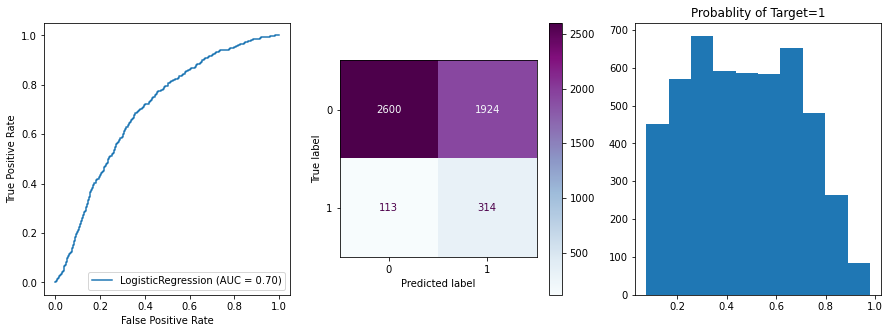

In [66]:
lr1 = LogisticRegression(max_iter=100)
lr1.fit(X_under_train, y_under_train)
y_predict= lr1.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Undersampled', 'Logistic Regression')

cross_val_report(lr1, X_under_train, y_under_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr1, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr1, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr1.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [67]:
confusion_matrix(y_test_orig, y_predict)

array([[2600, 1924],
       [ 113,  314]], dtype=int64)

### KS Stats for Logistic Regression - Undersampled Data

In [68]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,lift_1,lift_2
0,10,495,82,413,16.565657,83.434343,495,82,413,26.114650,8.906621,17.208029,16.565657,2.611993
1,9,495,91,404,18.383838,81.616162,990,173,817,55.095541,17.619150,37.476391,17.474747,2.755334
2,8,495,66,429,13.333333,86.666667,1485,239,1246,76.114650,26.870822,49.243828,16.094276,2.537668
3,7,495,58,437,11.717172,88.282828,1980,297,1683,94.585987,36.295018,58.290969,15.000000,2.365127
4,6,495,17,478,3.434343,96.565657,2475,314,2161,100.000000,46.603407,53.396593,12.686869,2.000404
5,5,495,0,495,0.000000,100.000000,2970,314,2656,100.000000,57.278413,42.721587,10.572391,1.667003
6,4,495,0,495,0.000000,100.000000,3465,314,3151,100.000000,67.953418,32.046582,9.062049,1.428860
7,3,495,0,495,0.000000,100.000000,3960,314,3646,100.000000,78.628424,21.371576,7.929293,1.250253
8,2,495,0,495,0.000000,100.000000,4455,314,4141,100.000000,89.303429,10.696571,7.048260,1.111336
9,1,496,0,496,0.000000,100.000000,4951,314,4637,100.000000,100.000000,0.000000,6.342153,1.000000


## Logistic Regression - Oversampled Data

Classification Report on Testing Data:
Oversampled data
Logistic Regression Classifier

---------------------------------------
Recall: 0.6557377049180327
Precision: 0.1724137931034483
F1 score: 0.27303754266211605
Accuracy: 0.6988487174308221
---------------------------------------

Cross Validation Report
Recall: 0.7051816631810403
Precision: 0.6919991253895902
F1: 0.6982736416872094
Accuracy: 0.6957488420318355

*Mean values presented
---------------------------------------


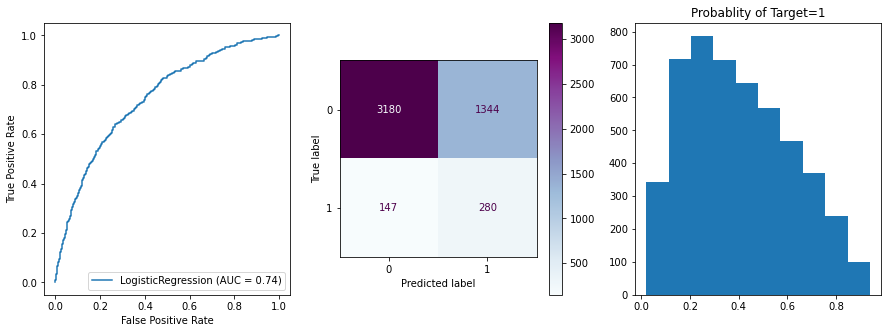

In [69]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(X_over_train, y_over_train)
y_predict= lr2.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Oversampled', 'Logistic Regression')

cross_val_report(lr2, X_over_train, y_over_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr2, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr2, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr2.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [70]:
confusion_matrix(y_test_orig, y_predict)

array([[3180, 1344],
       [ 147,  280]], dtype=int64)

### KS Stats for Logistic Regression - Oversampled Data

In [71]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['lift_1'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift_2'] = ks_table['lift_1']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,lift_1,lift_2
0,10,495,134,361,27.070707,72.929293,495,134,361,47.857143,7.728538,40.128605,27.070707,4.786681
1,9,495,79,416,15.959596,84.040404,990,213,777,76.071429,16.634554,59.436875,21.515152,3.804340
2,8,495,60,435,12.121212,87.878788,1485,273,1212,97.500000,25.947335,71.552665,18.383838,3.250657
3,7,495,7,488,1.414141,98.585859,1980,280,1700,100.000000,36.394776,63.605224,14.141414,2.500505
4,6,495,0,495,0.000000,100.000000,2475,280,2195,100.000000,46.992079,53.007921,11.313131,2.000404
5,5,495,0,495,0.000000,100.000000,2970,280,2690,100.000000,57.589381,42.410619,9.427609,1.667003
6,4,495,0,495,0.000000,100.000000,3465,280,3185,100.000000,68.186684,31.813316,8.080808,1.428860
7,3,495,0,495,0.000000,100.000000,3960,280,3680,100.000000,78.783986,21.216014,7.070707,1.250253
8,2,495,0,495,0.000000,100.000000,4455,280,4175,100.000000,89.381289,10.618711,6.285073,1.111336
9,1,496,0,496,0.000000,100.000000,4951,280,4671,100.000000,100.000000,0.000000,5.655423,1.000000


------
------

### ------------------------------------------------------End of Model Exploration---------------------------------------------------------------

## PRE-BUCKETING VISUALIZATIONS FOR INFERENCES

### SCR Vs Occupation Vs Target

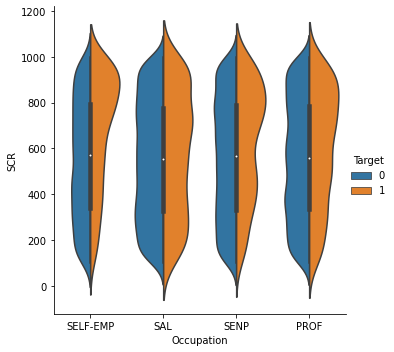

In [72]:
sns.catplot(x="Occupation", y="SCR", hue = "Target",data=data, kind = "violin", split = True)
plt.show()

##### Inferences: 

- `SELF-EMP` class tends to have more `SCR` values who are likely to opt for loans.
- `SAL` class shows uniformity across `SCR` for people opting/not opting for loans.
- `SENP` business class tend to show similar fashion like `SELF-EMP` class when it comes to opting for loans.
- `PROF` class tends to lie somewhere between `SENP` and `SAL` class.

### SCR Vs Occupation Vs Target

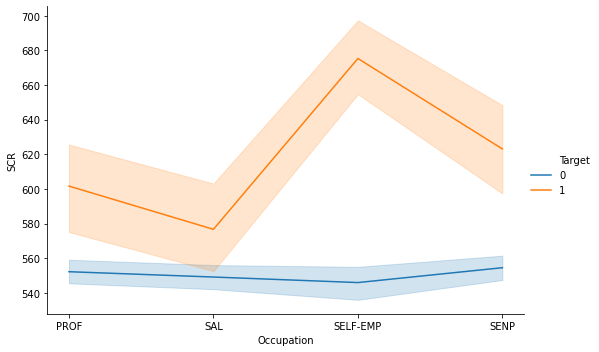

In [73]:
sns.relplot(x="Occupation", y="SCR", hue = "Target",data=data, aspect=1.5, kind = "line")
plt.show()

### SCR Vs Occupation Vs Target

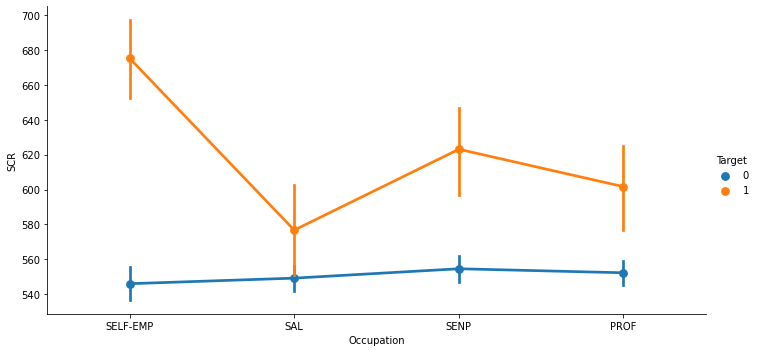

In [74]:
sns.catplot(x="Occupation", y="SCR", hue = "Target",data=data, aspect=2.0, kind = "point")
plt.show()

##### Inferences: 

- `SELF-EMP`class, there can be seen a high `SCR` value ranging between 660 to 700 points who have shown interest in opting for loans whereas least interest in the same class was shown at 540 to 550 points of `SCR`

- `SENP` class. are the second in line to opt for Loans, as they tend to show comaratively hgiher `SCR` values in the line graph above.

In [75]:
data1 = data.copy()

## Bucketing for AGE values

#### pd.qcut() function

In [76]:
data1['Ageb'] = pd.qcut(data['Age'], q=4)

In [77]:
data1.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period,Ageb
0,0,41,M,91519,SELF-EMP,38,926,15,"(38.0, 46.0]"
1,0,52,M,117288,SAL,17,768,13,"(46.0, 55.0]"
2,0,31,F,259827,SENP,8,816,5,"(30.0, 38.0]"
3,0,45,F,26677,PROF,14,353,18,"(38.0, 46.0]"
4,0,39,F,43440,SENP,1,751,31,"(38.0, 46.0]"


#### AGE Intervals

In [78]:
data1.Ageb.value_counts()

(30.0, 38.0]      5188
(20.999, 30.0]    5136
(46.0, 55.0]      4936
(38.0, 46.0]      4544
Name: Ageb, dtype: int64

In [79]:
data1.dtypes

Target               int64
Age                  int64
Gender              object
Balance              int32
Occupation          object
No_OF_CR_TXNS        int64
SCR                  int64
Holding_Period       int64
Ageb              category
dtype: object

In [80]:
data1.Ageb

0          (38.0, 46.0]
1          (46.0, 55.0]
2          (30.0, 38.0]
3          (38.0, 46.0]
4          (38.0, 46.0]
              ...      
19995    (20.999, 30.0]
19996      (30.0, 38.0]
19997      (38.0, 46.0]
19998      (30.0, 38.0]
19999      (30.0, 38.0]
Name: Ageb, Length: 19804, dtype: category
Categories (4, interval[float64]): [(20.999, 30.0] < (30.0, 38.0] < (38.0, 46.0] < (46.0, 55.0]]

In [81]:
data1.head(5)

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period,Ageb
0,0,41,M,91519,SELF-EMP,38,926,15,"(38.0, 46.0]"
1,0,52,M,117288,SAL,17,768,13,"(46.0, 55.0]"
2,0,31,F,259827,SENP,8,816,5,"(30.0, 38.0]"
3,0,45,F,26677,PROF,14,353,18,"(38.0, 46.0]"
4,0,39,F,43440,SENP,1,751,31,"(38.0, 46.0]"


In [82]:
# sns.pairplot(data1, hue='Target')

In [83]:
data1 = pd.get_dummies(data1)

In [84]:
data1.head(2)

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,"Ageb_(20.999, 30.0]","Ageb_(30.0, 38.0]","Ageb_(38.0, 46.0]","Ageb_(46.0, 55.0]"
0,0,41,91519,38,926,15,0,1,0,0,1,0,0,0,1,0
1,0,52,117288,17,768,13,0,1,0,1,0,0,0,0,0,1


In [85]:
data2 = data1.copy()

In [86]:
data1.columns

Index(['Target', 'Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period',
       'Gender_F', 'Gender_M', 'Occupation_PROF', 'Occupation_SAL',
       'Occupation_SELF-EMP', 'Occupation_SENP', 'Ageb_(20.999, 30.0]',
       'Ageb_(30.0, 38.0]', 'Ageb_(38.0, 46.0]', 'Ageb_(46.0, 55.0]'],
      dtype='object')

### Age Bucket Ranking Function

In [87]:
cols = ['Ageb_(30.0, 38.0]', 'Ageb_(20.999, 30.0]','Ageb_(46.0, 55.0]','Ageb_(38.0, 46.0]']

def func1(x):
    if x ==1:
        return 1
def func2(x):
    if x ==1:
        return 2

def func3(x):
    if x ==1:
        return 3

def func4(x):
    if x ==1:
        return 4


data1['age_d'] = data1['Ageb_(30.0, 38.0]'].apply(func1)
data1['age_d'] = data1['Ageb_(20.999, 30.0]'].apply(func2)
data1['age_d'] = data1['Ageb_(46.0, 55.0]'].apply(func3)
data1['age_d'] = data1['Ageb_(38.0, 46.0]'].apply(func4)

In [88]:
for ind, row in data1.iterrows():
    if row['Ageb_(20.999, 30.0]'] ==1:
        data1.loc[ind, 'age_d'] = 1
    elif row['Ageb_(30.0, 38.0]'] ==1:
        data1.loc[ind, 'age_d'] = 2
    elif row['Ageb_(38.0, 46.0]'] ==1:
        data1.loc[ind, 'age_d'] = 3
    elif row['Ageb_(46.0, 55.0]'] ==1:
        data1.loc[ind, 'age_d'] = 4

In [89]:
data1.age_d.value_counts()

2.0    5188
1.0    5136
4.0    4936
3.0    4544
Name: age_d, dtype: int64

#### Converting Age buckets to integer type

In [90]:
data1.age_d = data1.age_d.astype('int32')

In [91]:
data1.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,"Ageb_(20.999, 30.0]","Ageb_(30.0, 38.0]","Ageb_(38.0, 46.0]","Ageb_(46.0, 55.0]",age_d
0,0,41,91519,38,926,15,0,1,0,0,1,0,0,0,1,0,3
1,0,52,117288,17,768,13,0,1,0,1,0,0,0,0,0,1,4
2,0,31,259827,8,816,5,1,0,0,0,0,1,0,1,0,0,2
3,0,45,26677,14,353,18,1,0,1,0,0,0,0,0,1,0,3
4,0,39,43440,1,751,31,1,0,0,0,0,1,0,0,1,0,3


## POST-BUCKETING VISUALIZATIONS FOR INFERENCES

### SCR Vs Age-Category Vs Target

AGE Intervals & Ranking

- (20.9, 30.0]   ----> 1
- (30.0, 38.0]   ----> 2
- (38.0, 46.0]   ----> 3
- (46.0, 55.0]   ----> 4

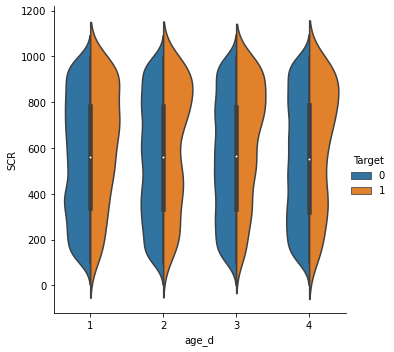

In [92]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

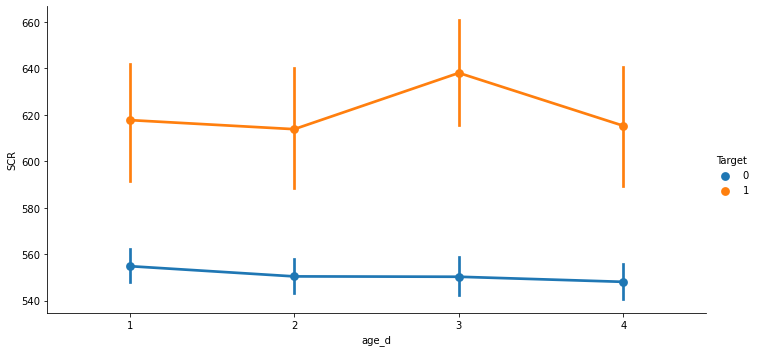

In [93]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, aspect=2.0, kind = "point")
plt.show()

##### Inferences: 

- The `Age groups` `(20.9-30] years` and `(38-46] years` tend to showwcase higher `SCR` values hence more interest towards opting for lonans. However, the age groups (30-38] and (46.0-55) showcase least interest in opting for loans.

### SCR Vs Age-Category Vs Target

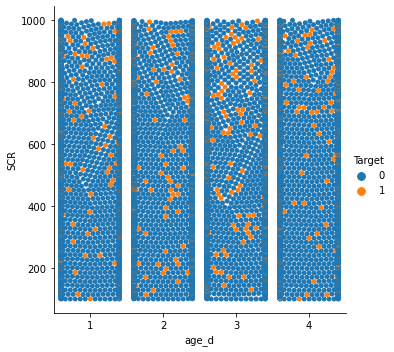

In [94]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, kind = "swarm")
plt.show()

In [95]:
sns.set_style('ticks')

## BUCKETING SCR & HOLDING PERIODS

In [96]:
data1['SCRb'] = pd.qcut(data['SCR'], q=5)

In [97]:
data1.SCRb.value_counts()

(99.999, 288.0]    3987
(468.0, 651.0]     3964
(826.0, 999.0]     3956
(651.0, 826.0]     3952
(288.0, 468.0]     3945
Name: SCRb, dtype: int64

In [98]:
data1['HPB'] = pd.qcut(data['Holding_Period'], q=4)

In [99]:
data1.HPB.value_counts()

(0.999, 8.0]    5519
(16.0, 23.0]    4998
(8.0, 16.0]     4791
(23.0, 31.0]    4496
Name: HPB, dtype: int64

In [100]:
data1.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,"Ageb_(20.999, 30.0]","Ageb_(30.0, 38.0]","Ageb_(38.0, 46.0]","Ageb_(46.0, 55.0]",age_d,SCRb,HPB
0,0,41,91519,38,926,15,0,1,0,0,1,0,0,0,1,0,3,"(826.0, 999.0]","(8.0, 16.0]"
1,0,52,117288,17,768,13,0,1,0,1,0,0,0,0,0,1,4,"(651.0, 826.0]","(8.0, 16.0]"
2,0,31,259827,8,816,5,1,0,0,0,0,1,0,1,0,0,2,"(651.0, 826.0]","(0.999, 8.0]"
3,0,45,26677,14,353,18,1,0,1,0,0,0,0,0,1,0,3,"(288.0, 468.0]","(16.0, 23.0]"
4,0,39,43440,1,751,31,1,0,0,0,0,1,0,0,1,0,3,"(651.0, 826.0]","(23.0, 31.0]"


### SCR-Bucketed Vs Age-Category Vs Target

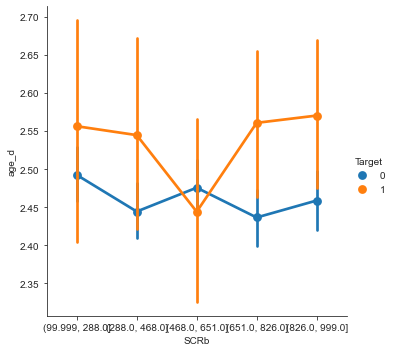

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [101]:
sns.catplot(x="SCRb", y="age_d", hue = "Target",data=data1, kind = "point", split = True,)
plt.show()
plt.figure(figsize=(10,10))

In [102]:
# sns.catplot(x="age_d", y="SCRb", hue = "Target",data=data1, kind = "swarm")
# plt.show()

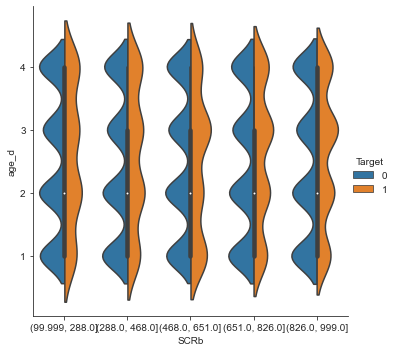

In [103]:
sns.catplot(x="SCRb", y="age_d", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

##### Inferences: 

- People in the `Age Group` `(46.0, 55.0]` years tend to have higher `SCR` score i.e. 826 to 1000 points and opt for loans as compared to `(30.0, 38.0]` years who stand at the second position for higher `SCR` values i.e. 650 to 830 points.

- People in the `Age Group` `(38.0, 46.0]` years tend to have `SCR` values between 400 to 650 points.

### Holding Period Bucketed Vs Age-Category Vs Target

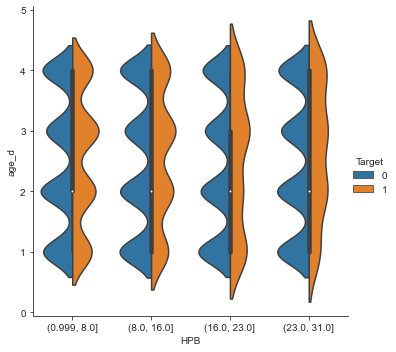

In [104]:
sns.catplot(x="HPB", y="age_d", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

##### Inferences: 

- Higher the `Holding Period` more stable is the money in the person's account. 
- `Holding Period` of 23-31 weeks tends to be uniform across all the `Age Groups`
- `Holding Period` between 1-8 weeks tends to lie in the `Age Groups` = 2 and 3 i.e. (30.0, 38.0] and (38.0, 46.0]

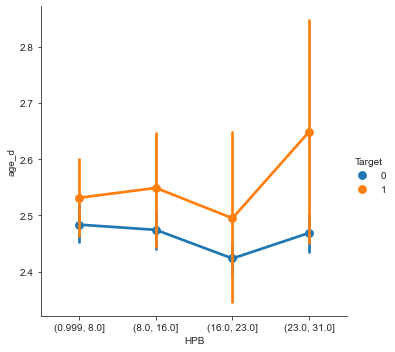

In [105]:
sns.catplot(x="HPB", y="age_d", hue = "Target",data=data1, kind = "point")
plt.show()

### Pair-Plot on Bucketed Data

In [106]:
# sns.pairplot(data1, hue = 'Target')
# plt.show()

##### Inferences from Pair-Plot: 

- People who tend to opt for loan have less `BALANCE` w.r.t people not buying loan.
- People having higher `BALANCE` tend to be in between 35-50 years of `AGE`.
- People having less `BALANCE` tend to show more interest towards loans i.e. higher `SCR` values.
- People having less `BALANCE` tend to have higher `No of Credit transactions` opt for loans.
- People having less `BALANCE` have higher `HOLDING PERIOD` who opt for loans.

------

### ----------------------------------------------------Start of Black Box Models Exploration------------------------------------------------

## SHAP - BlackBox Model

In [107]:
# import shap

In [108]:
# X_train_summary = shap.kmeans(X_train_orig, 10)

In [109]:
# explainerKNN = shap.KernelExplainer(clf_KNN0.predict,X_train_summary)

In [110]:
# shap_values_KNN_test = explainerKNN.shap_values(X_test_orig)

In [111]:
# shap.initjs()
# shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[:1000,:], X_test_orig.iloc[:1000,:])

## LIME- BlackBox Model

In [112]:
# import lime
# import lime.lime_tabular

In [113]:
# lgb_params = {
#   'task': 'train',
#     'boosting_type': 'goss',
#     'objective': 'binary',
#     'metric':'binary_logloss',
#     'metric': {'l2', 'auc'},
#     'num_leaves': 50,
#     'learning_rate': 0.1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'verbose': None,
#     'num_iteration':100,
#     'num_threads':7,
#     'max_depth':12,
#     'min_data_in_leaf':100,
#     'alpha':0.5}

In [114]:
# import warnings
# from lime import submodular_pick
# import lightgbm as lgb

# lgb_train = lgb.Dataset(X_train_orig, y_train_orig)
# lgb_eval = lgb.Dataset(X_test_orig, y_test_orig)

# model = lgb.train(lgb_params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5)
# lime.lime_tabular.LimeTabularExplainer(data[model.feature_name()].astype(int).values,  
# mode='classification',training_labels=data3['Target'],feature_names=model.feature_name())
# # Remember to convert the dataframe to matrix values
# # SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
# sp_obj = submodular_pick.SubmodularPick(explainer,data3[model.feature_name()].values, \
# prob, num_features=5,num_exps_desired=10)

# [exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

## CatBoost Classifier

In [115]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(random_seed=42)

In [116]:
# cate_features_index = np.where(data.dtypes != float)[0]

In [117]:
# X_over_train

In [118]:
# model.fit(X_under_train,y_under_train,cat_features=cate_features_index)

In [119]:
# test = pd.read_csv("test_data.csv")
# pred = model.predict(test)


In [120]:
# from sklearn.metrics import confusion_matrix

In [121]:
# confusion_matrix(y_test_orig, pred)

### ----------------------------------------------------End of Black Box Models Exploration------------------------------------------------

-----

## Model Evaluation Matrix - Which Models to be Considered?

In [122]:
model_eval = {'Good Fit Percent%': ['10.9','9.84','19.6','17.2','8.6','18.4','11.4','25.0','25.0','16.4','20.8','17.2'],
        'Comments': ['Not Considering','Not Considering','Not Considering','Not Considering','Not Considering','Not Considering',
                     'Not Considering','Considering','Considering','Not Considering','Considering','Not Considering',]
        }

df1 = pd.DataFrame(model_eval, columns = ['Good Fit Percent%','Comments'], index=['DecisionTreeClassifier - Original Data','DecisionTreeClassifier - UnderSampled Data','DecisionTreeClassifier - OverSampled Data',
                                                                           'KNN Classifier - Original Data','KNN Classifier - Undersampled Data','Random Forest Classifier - Original Data','RandomForest Classifier - Undersampled Data',
                                                                           'RandomForest Classifier - Oversampled Data','Logistic Regression - Original Data','Logistic Regression - Undersampled Data',
                                                                          'Logistic Regression - Oversampled Data','KNN Classifier - Oversampled Data'])

print (df1)

                                            Good Fit Percent%         Comments
DecisionTreeClassifier - Original Data                   10.9  Not Considering
DecisionTreeClassifier - UnderSampled Data               9.84  Not Considering
DecisionTreeClassifier - OverSampled Data                19.6  Not Considering
KNN Classifier - Original Data                           17.2  Not Considering
KNN Classifier - Undersampled Data                        8.6  Not Considering
Random Forest Classifier - Original Data                 18.4  Not Considering
RandomForest Classifier - Undersampled Data              11.4  Not Considering
RandomForest Classifier - Oversampled Data               25.0      Considering
Logistic Regression - Original Data                      25.0      Considering
Logistic Regression - Undersampled Data                  16.4  Not Considering
Logistic Regression - Oversampled Data                   20.8      Considering
KNN Classifier - Oversampled Data                   

In [123]:
data1.to_excel("F:\\IBPA_IIM_FinalProject\\data1.xlsx")

In [124]:
df1 = data._get_numeric_data()

In [125]:
df1

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,91519,38,926,15
1,0,52,117288,17,768,13
2,0,31,259827,8,816,5
3,0,45,26677,14,353,18
4,0,39,43440,1,751,31
...,...,...,...,...,...,...
19995,0,23,67612,20,164,27
19996,0,34,472365,8,124,1
19997,0,42,100642,4,263,1
19998,0,36,29950,10,345,31


In [126]:
df1.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,91519,38,926,15
1,0,52,117288,17,768,13
2,0,31,259827,8,816,5
3,0,45,26677,14,353,18
4,0,39,43440,1,751,31


In [127]:
vif = pd.DataFrame()

In [128]:
vif["VIF Factor"] = [variance_inflation_factor(X_original.values, i) for i in range(X_original.shape[1])]

In [129]:
vif["features"] = X_original.columns

In [130]:
vif.round(1)

,VIF Factor,features
0,8.7,Age
1,1.7,Balance
2,2.9,No_OF_CR_TXNS
3,4.8,SCR
4,3.6,Holding_Period
5,3.9,Gender_M
6,2.1,Occupation_SAL
7,1.5,Occupation_SELF-EMP
8,1.9,Occupation_SENP


In [131]:
vif.round(3)

,VIF Factor,features
0,8.749,Age
1,1.699,Balance
2,2.866,No_OF_CR_TXNS
3,4.764,SCR
4,3.553,Holding_Period
5,3.850,Gender_M
6,2.083,Occupation_SAL
7,1.542,Occupation_SELF-EMP
8,1.886,Occupation_SENP


In [132]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree



Classification Report on Testing Data:
Original data
Decision Tree Classifier

---------------------------------------
Recall: 0.07494145199063232
Precision: 0.6274509803921569
F1 score: 0.13389121338912136
Accuracy: 0.916380529186023
---------------------------------------



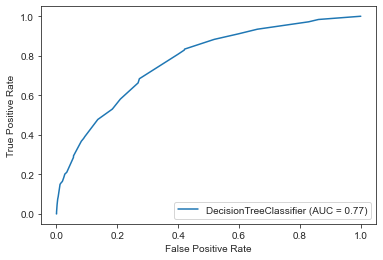

In [133]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train_orig, y_train_orig)
y_prediction_orig = clf.predict(X_test_orig)
classification_report(y_test_orig, y_prediction_orig, 'Original', 'Decision Tree')
plot_roc_curve(clf, X_test_orig, y_test_orig)
plt.show()
# cross_val_report(clf, y_test_orig,y_under_prediction.reshape(1,-1))

In [134]:
# fig = plt.figure(figsize=(50,20), dpi = 800)
# tree.plot_tree(clf, 
#                    feature_names=X_original.columns.tolist(),  
#                    class_names=['0','1'],
#                    filled=True, fontsize=10)

# print(tree)

In [135]:
df2 = df.copy()

In [136]:
feature_names = df2.iloc[:,1:]
target_names = df.iloc[:,0]

In [137]:
# plt.figure(figsize = (5,5), dpi = 800)

# tree.plot_tree(clf,feature_names = list(feature_names), \
#               class_names = ["0", "1"], proportion = True, \
#                filled = True)

In [138]:
!pip install graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=list(feature_names.columns),  
#                                 class_names=iris.target_names
                               )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
print(graph)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# Display the rules of all the nodes
plt.figure(figsize = None, dpi = 800)
tree_rules = tree.export_text(clf,  feature_names = list(feature_names))
print(tree_rules)

In [ ]:
# plt.figure(figsize = (5,5), dpi = 800)

# feature_names = df.drop("left", axis =1).columns

# tree.plot_tree(clf,feature_names = feature_names.tolist(), \
#               class_names = ["stayed", "left"], proportion = True, \
#                filled = True)

# plt.show

In [ ]:
# text_representation = tree.export_text(clf)
# print(text_representation)

In [ ]:
# from sklearn.tree import _tree

# def tree_to_code(tree, feature_names):

# 	'''
# 	Outputs a decision tree model as a Python function
	
# 	Parameters:
# 	-----------
# 	tree: decision tree model
# 		The decision tree to represent as a function
# 	feature_names: list
# 		The feature names of the dataset used for building the decision tree
# 	'''

# 	tree_ = tree.tree_
# 	feature_name = [
# 		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
# 		for i in tree_.feature
# 	]
# 	print("def tree({}):".format(", ".join(feature_names)))

# 	def recurse(node, depth):
# 		indent = "  " * depth
# 		if tree_.feature[node] != _tree.TREE_UNDEFINED:
# 			name = feature_name[node]
# 			threshold = tree_.threshold[node]
# 			print("{}if {} <= {}:".format(indent, name, threshold))
# 			recurse(tree_.children_left[node], depth + 1)
# 			print("{}else:  # if {} > {}".format(indent, name, threshold))
# 			recurse(tree_.children_right[node], depth + 1)
# 		else:
# 			print("{}return {}".format(indent, tree_.value[node]))

# 	recurse(0, 1)

In [ ]:
# from sklearn.tree import _tree

# tree_to_code(df2, list(X_original))

### ------------------------------------------------------------End of Capstone---------------------------------------------------------------------
-----------